## Проект по приоритизации гипотез, запуску A/B-теста и анализа его результатов.

<div class="alert alert-block alert-info">
<h2> Цель проекта и план выполения <a class="tocSkip"> </h2>

В качестве аналитика крупного интернет-магазина, необходимо приоретизировать гипотезы и проанализировать результаты А/B-теста  
    
* Для решения первой задачи по приоретизации гипотез загрузим данные о гипотезах, применим фрейворки ICE и RICE, затем сравним полученные данные.  
* Для решения второй задачи по анализу результатов А/B-теста, загрузим соответствующие данные о визитах и заказах.  
Затем с помощью графиков и процентилей сделаем выводы о результатах теста.  
* На следующем этапе посчитаем статистическую значимость различий по конверсии и среднему чеку между группами как на "сырых",  так и на "очищенных" данных
    
* По результатам проведенного анализа примем решение в отношении проведенного теста.    
    

</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
try:
    visitors = pd.read_csv('C:/Users/Lenovo/Downloads/visitors.csv')
    orders = pd.read_csv('C:/Users/Lenovo/Downloads/orders.csv')
    data = pd.read_csv('C:/Users/Lenovo/Downloads/hypothesis.csv')
    
except:
    visitors = pd.read_csv('/datasets/visitors.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    data = pd.read_csv('/datasets/hypothesis.csv')

### Часть 1. Приоритизация гипотез.

* Изучим данные о гипотезах

In [3]:
pd.set_option("max_colwidth", 200)

In [4]:
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
data.columns = data.columns.str.lower()

In [6]:
data['ICE'] = (data['impact'] * data['confidence']) / data['efforts']

In [7]:
data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [8]:
data['RICE'] = (data['reach']*data['impact']*data['confidence']) / data['efforts']

data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


<div class="alert alert-block alert-info" style="border-radius: 15px; border: 3px solid blue; padding: 15px; ">
    
Для ICE  приоретизация оказалась такой: 8, 0, 7, 6, 2, 1, 5, 3, 4.  
Для RICE приоретизация оказалась такой: 7, 2, 0, 6, 8, 3, 1, 5, 4.
    
Ситуция с приоритетом гипотез изменилась, так как в числителе добавился множитель 'reach', то есть скольких пользователей затронет изменение. Таким образом, вверх по приоритетам поднялись гипотезы 7 и 2, а 0 немного опустилась. А вот 8 опустилась существенно.

    
</div>

### Часть 2. Анализ A/B-теста

#### 1. Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

In [9]:
import datetime as dt
from scipy import stats as st

In [10]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [15]:

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

* Так как понадобится построение графиков для различных куммулятивных данных, поэтому преобразуем обе исходные таблицы и объеденим данные в одну общую.

In [16]:
datesGroups = orders[['date','group']].drop_duplicates()

Найдем пользователей, которые попали в обе группы.

In [17]:
groupA = orders.query('group == "A"')
groupB = orders.query('group == "B"')

In [18]:
dublicate = groupB[groupB['visitorId'].isin(groupA['visitorId'])]
print(dublicate['visitorId'].nunique())


58


In [19]:
print(orders['visitorId'].nunique())

1031


In [20]:
visitorId = dublicate['visitorId'].unique().tolist()

In [21]:
orders = orders.query('visitorId not in @visitorId')

In [22]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1016 non-null int64
visitorId        1016 non-null int64
date             1016 non-null datetime64[ns]
revenue          1016 non-null int64
group            1016 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


Таких пользователей оказалось 58, логично их удалить, так как эти записи являются ошибкой и точно искажают общую картину теста.

In [23]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
        .agg({'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
            }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [24]:
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


In [25]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
        .agg({'date': 'max',
            'group': 'max',
            'visitors': 'sum'
            }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [26]:
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [27]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [28]:
cumulativeData.head()

,date,group,transactionId,visitorId,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [29]:
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [30]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

In [31]:
cumulativeRevenueA.head()

,date,revenue,orders
0,2019-08-01,142779,23
2,2019-08-02,234381,42
4,2019-08-03,346854,66
6,2019-08-04,388030,77
8,2019-08-05,474413,99


*Теперь построим график кумулятивной выручки по группам

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



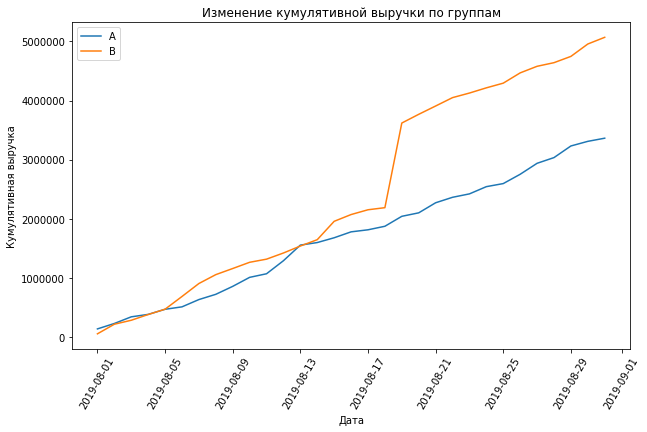

In [32]:
plt.figure(figsize=(10,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label = 'A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label = 'B')
plt.title('Изменение кумулятивной выручки по группам')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.xticks(rotation=60)
plt.show()

* При сравнительно похожих результатах в начале теста, выручка группы В ближе к середине временного интервала выросла, а затем совершила еще более резкий скачок. Предположительно это связано с какой-то аномалией. Следует более внимательно изучить данное предположение.

#### 2. Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

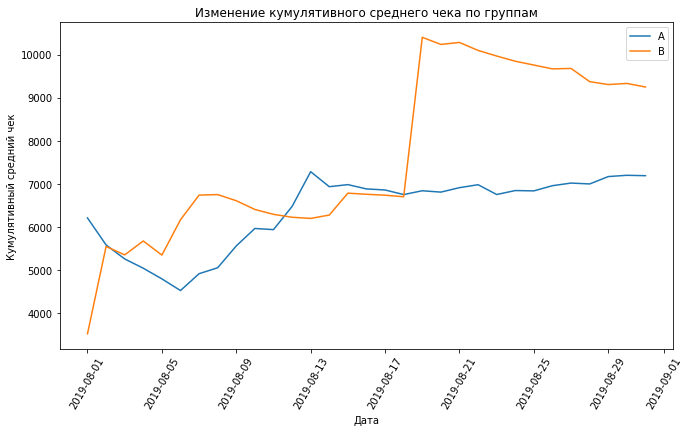

In [33]:
plt.figure(figsize=(11,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label = 'A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label = 'B')
plt.legend()
plt.title('Изменение кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.xticks(rotation=60)
plt.show()

* График кумулятивного среднего чека претерпевает существенные колебания, например, резкий скачок вначале второй полвины теста. Предположительно это произошло в связи с аномальной крупной покупкой. Поэтому выводы делать преждевременно, сначала нужно "очистить" данные.

#### 3. Построим график относительного изменения кумулятивного среднего чека группы В к А. Сделаем выводы и предположения.

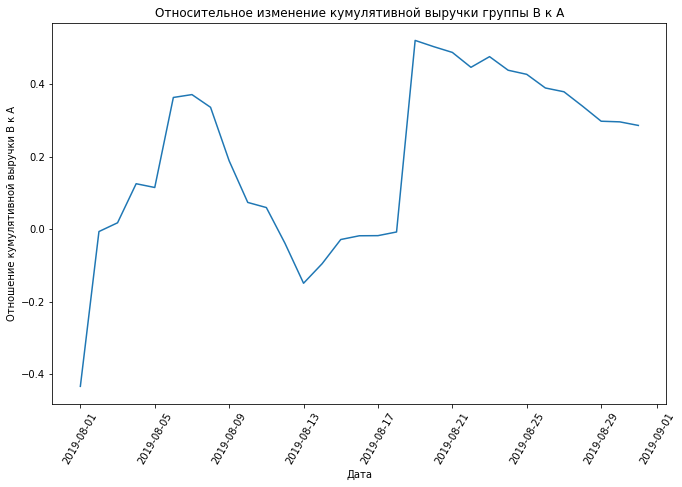

In [34]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', suffixes=['A', 'B'])
plt.figure(figsize=(11,7))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительное изменение кумулятивной выручки группы В к А')
plt.xlabel('Дата')
plt.ylabel('Отношение кумулятивной выручки В к А')
plt.xticks(rotation=60)
plt.show()


* На графике присутствуют резкие изменения относительной величины среднего чека, то есть в эти даты происходило значительное изменение в одной из групп. Предположительно, к такой ситуации могли привести аномальные заказы.

#### 4. Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения.

In [35]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

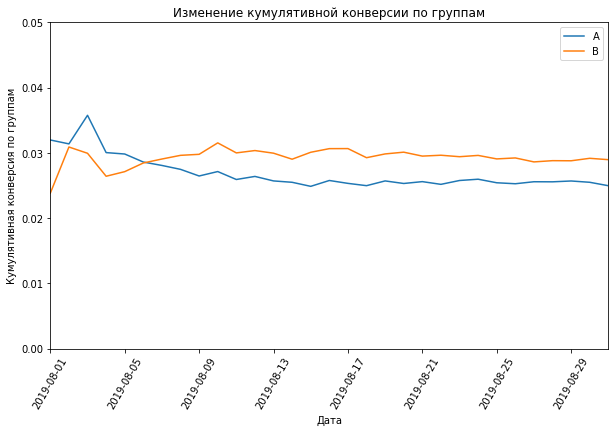

In [36]:
plt.figure(figsize=(10,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.axis(["2019-08-01", '2019-08-31', 0, 0.05])
plt.title('Изменение кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия по группам')
plt.xticks(rotation=60)
plt.show()

In [37]:
cumulativeData['date'].head()

0   2019-08-01
1   2019-08-01
2   2019-08-02
3   2019-08-02
4   2019-08-03
Name: date, dtype: datetime64[ns]

In [38]:
cumulativeData['date'].tail()

57   2019-08-29
58   2019-08-30
59   2019-08-30
60   2019-08-31
61   2019-08-31
Name: date, dtype: datetime64[ns]

* Уменьшив масштаб графика видно, что во второй половине теста конверсии стабилизировались и конверсия группы В стала стабильно выше группы А. 

#### 5. Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения.

In [39]:
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(cumulativeDataB[['date', 'conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

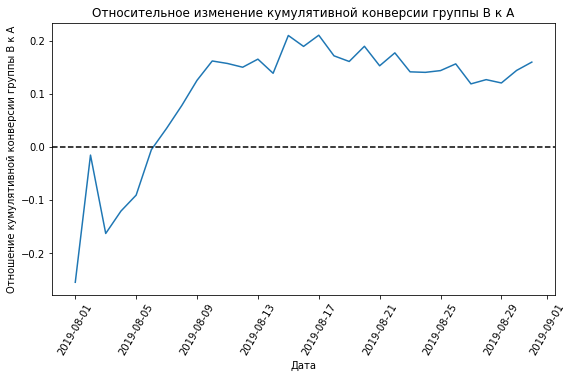

In [40]:
plt.figure(figsize=(9,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивной конверсии группы В к А')
plt.xlabel('Дата')
plt.ylabel('Отношение кумулятивной конверсии группы В к А')
plt.xticks(rotation=60)
plt.show()

* С начала теста конверсия группы В то растет, то падает относительно группы А. Однако, затем стабильно растет, а затем колеблется в диапазоне 10-20%.

#### 6. Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

In [41]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [42]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

In [43]:
ordersByUsers.columns = ['userId', 'orders']

In [44]:
ordersByUsers.sort_values(by='orders', ascending=False).head(8)

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2


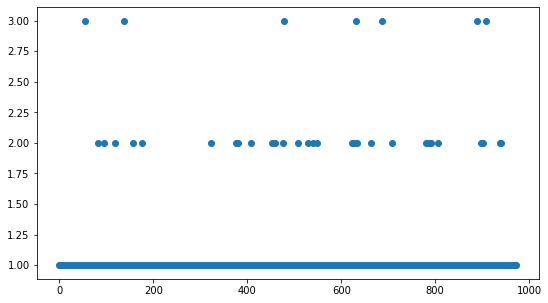

In [45]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(9,5))
plt.scatter(x_values, ordersByUsers['orders'])
plt.show()

* Количество заказов выглядит нормальным для 1 и 2, а вот для больше 2 это выброса. Для более точного ответа на вопрос является ли 2 покупки выбросом или нет, необходимо провести дополнительное исследование.

#### 7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [46]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


* Совершали более 1 заказ 5% пользователей, а более 2 заказов только 1%. Таким образом, причем 1 за верхнюю границу числа заказов

#### 8. Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

In [47]:
orders.sort_values(by='revenue', ascending=False).head(10)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A
949,1347999392,887908475,2019-08-21,60450,A
940,2420050534,4003628586,2019-08-08,58550,B
131,3163614039,2254586615,2019-08-22,53904,A


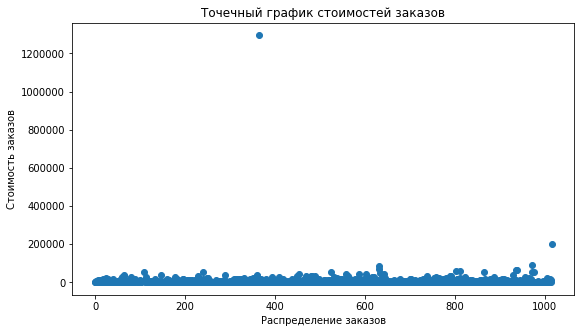

In [48]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(9,5))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Распределение заказов')
plt.ylabel('Стоимость заказов')
plt.show()

* Заказов со стоимостью выше 100 000 всего 2, это явно выбросы. Преположим, что 100 000 это граница для стоимости заказов, выясним это. 

#### 9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [49]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


* Только у 5% заказов стоимость выше 26 785, а у 1% выше 53 904. Таким образом, логичо взять за верхнюю границу стоимости заказов 26 785.

#### 10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения.

* Для проведения подсчетов подготовим данные:

In [50]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Посчитаем кумулятивное количество пользователей по группам.

In [51]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [52]:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [53]:
visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [54]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [55]:
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

Посчитаем кумулятивное количество заказов и выручку по каждой группе.

In [56]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [57]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [58]:
ordersADaily.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,23,142779
1,2019-08-02,19,91602
2,2019-08-03,24,112473
3,2019-08-04,11,41176
4,2019-08-05,22,86383


In [59]:
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA',]

In [60]:
ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,23,142779
1,2019-08-02,42,234381
2,2019-08-03,66,346854
3,2019-08-04,77,388030
4,2019-08-05,99,474413


In [61]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [62]:
ordersBDaily.head()

,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,17,59758
1,2019-08-02,23,162043
2,2019-08-03,14,67049
3,2019-08-04,14,96890
4,2019-08-05,21,89908


In [63]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB',]

In [64]:
ordersBCummulative.head()

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,17,59758
1,2019-08-02,40,221801
2,2019-08-03,54,288850
3,2019-08-04,68,385740
4,2019-08-05,89,475648


Объеденим данные по пользователям и заказам обеих групп.

In [65]:
df = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


In [66]:
df.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Найдем количество заказов соответствующее каждому пользователю для каждой группы.

In [67]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

In [68]:
ordersByUsersB.head()

,userId,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


Добавим нули для пользователей,  не делавших заказы.

In [69]:
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(df['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(df['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Посчитаем статистическую значимость различий конверсий между группами.

In [70]:
import scipy.stats as stats

Сформулируем нулевую гипотезу о том, что конверсии не различаются значимо. Следовательно альтернативной будет гипотеза о различии конверсиий между группами А и В.

In [71]:
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative="two-sided")[1]))

0.01102


* Р-значение меньше 0.05, поэтому отвергам нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет отвергаем. Посмотрим на относительный прирост конверсии группы В к А.

In [72]:
print("{0:.1%}".format(
    (df['ordersPerDateB'].sum()/df['visitorsPerDateB'].sum())/(df['ordersPerDateA'].sum()/df['visitorsPerDateA'].sum())-1)
)

16.0%


* Прирост составил около 16%. Интересно, что покажет тест на "очищенных" данных.

#### 11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

Сформулируем нулевую гипотезу предположив, что средний чек между группами А и В значимо не различается. Следовательно, альтернативной гипотезой будет выступать предположение о значимом различии в среднем чеке между группами А и В.

In [73]:
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative="two-sided")[1])
)

0.829


In [74]:
print("{0:.1%}".format(orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean() - 1)
)

28.7%


* Р-значение больше 0.05, поэтому мы не можем отвергнуть нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет. При этом относительный прирост среднего чека составил больше 28%. Проверим данные без выбросов.

#### 12. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения.

Найдем аномальных пользователей, то есть, совершивших более 2 заказов в каждой группе:

In [75]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']
    ],
    axis=0,
)

Добавим к аномальным пользователей с условием, что у них заказы дороже 28000:

In [76]:
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [77]:
usersWithExpensiveOrders.count()

48

Уберем аномальных пользователей, и подготовим "очищенные" данные для теста

In [78]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Проведем тест и выведем относительное изменение конверсии группы В относительно группы А, на "очищенных" данных

Сформулируем нулевую гипотезу о том, что конверсии не различаются значимо. Следовательно альтернативной будет гипотеза о различии конверсиий между группами А и В.

In [79]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered,  alternative="two-sided")[1]))
print('{0:.1%}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.009
18.9%


Как и в ранее проведенном тесте с "сырыми" данными Р-значение ниже установленной значимости в 0.05. Поэтому отвергаем нулевую гипотезу и принимаем за верное утверждение о различии конверсии между группами. Причем, относительно различие составляет более 18% в пользу группы В.

#### 13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

Сформулируем нулевую гипотезу предположив, что средний чек между группами А и В значимо не различается. Следовательно, альтернативной гипотезой будет выступать предположение о значимом различии в среднем чеке между группами А и В.

In [80]:
print("{0:.3f}".format(
    stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'], orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'], alternative="two-sided")[1])
)

print(
    "{0:.1%}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.762
-2.2%


* Как и в ранее проведенном тесте с "сырыми" данными Р-значение выше установленной значимости в 0.05. Значит мы не можем отвергнуть нулевую гипотезу, то есть не можем утверждать, что различие в среднем чеке значимо. Это подтвержадется и посчитанной относительной величиной различия среднего чека, где группа В отстает на 2%.

#### 14. Примем решение по результатам теста.

На основании проведенного теста мы выявили, что конверсия группы В выше, чем у группы А, причем это различие значимо статистически. Также выявили, что во второй половине теста конверсии стабилизировались.  
Со средним чеком ситуация другая, то есть статистически значимого различия не выявлено, даже после "очищения" данных, причем группа В хоть и незначительно, но уступает группе А.  
В соответствии со сделанными выводами, следует остановить тест и признать победителем группу В только в одной метрике, то есть конверсии.